<a href="https://colab.research.google.com/github/Dinda023/Mini-Project-Data-Mining/blob/main/Checkpoint_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Ramen Terpopular Berdasarkan Penilaian Konsumen**

#**Import Library**

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ramen ratings adalah untuk melakukan analisis yang mendalam terhadap faktor-faktor yang memengaruhi penilaian konsumen terhadap ramen. Selain itu, tujuannya adalah untuk meningkatkan kualitas produk, memahami keinginan dan preferensi pelanggan, dan membuat keputusan yang dapat meningkatkan pangsa pasar ramen.

##**Assess Situation**

Situasi bisnis ini melibatkan pemahaman terhadap preferensi pelanggan terhadap ramen. Dengan memahami tren penilaian, produsen dapat merespons secara lebih baik terhadap kebutuhan pasar dan meningkatkan daya saing produk mereka. Kesadaran terhadap kecenderungan pasar dan kepuasan pelanggan dapat membantu menciptakan ramen yang lebih disukai oleh konsumen.

##**Data Mining Goals**

Bertujuan untuk mengidentifikasi faktor-faktor kunci yang mempengaruhi penilaian konsumen terhadap ramen, menentukan segmen pelanggan dengan preferensi khusus, membangun model prediktif untuk memproyeksikan penilaian di masa depan, dan melakukan perbandingan penilaian produk ramen dengan pesaing untuk mengidentifikasi kekuatan dan kelemahan produk. Tujuan utamanya adalah memberikan wawasan yang dapat mendukung pengambilan keputusan dalam meningkatkan kualitas dan daya saing ramen di pasar.

##**Project Plan**

Rencana proyek dimulai dengan pengumpulan data dari sumber yang tersedia. Data kemudian akan dibersihkan dan diolah untuk mengatasi masalah seperti nilai yang hilang atau tidak valid. Setelah itu, pemeriksaan data akan dilakukan untuk memahami karakteristik dataset dan menemukan pola yang menarik. Selanjutnya, teknik analisis akan digunakan dan hasil dari analisis ini akan memberikan wawasan tentang faktor-faktor kunci yang memengaruhi penilaian ramen, sehingga produsen dapat membuat keputusan yang lebih baik dalam meningkatkan kualitas produk mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang dipakai adalah data Ramen Ratings oleh ALEKSEY BILOGUR dari Kaggle.
Dataset Ramen Ratings adalah kumpulan data yang memuat informasi tentang berbagai merek ramen dari seluruh dunia bersama dengan penilaian atau peringkat yang diberikan oleh para pengulas. Dataset ini dapat digunakan untuk menganalisis variasi dalam berbagai merek dan jenis ramen, serta untuk memahami preferensi pengguna.

In [22]:
df = ('https://raw.githubusercontent.com/Dinda023/Mini-Project-Data-Mining/main/Checkpoint%201/ramen-ratings.csv')
df_file = pd.read_csv(df)
df_file

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


##**Describe Data**

####Informasi Dasar

In [23]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian
jumlah_baris, jumlah_kolom = df_file.shape
print("Jumlah baris dalam dataset:", jumlah_baris)
print("Jumlah kolom dalam dataset:", jumlah_kolom)

Jumlah baris dalam dataset: 2580
Jumlah kolom dalam dataset: 7


Dengan jumlah baris sebanyak 2580, kita tahu bahwa dataset ini berisi informasi mengenai 2580 ulasan dari konsumen mengenai produk ramen.

Kolom yang dimiliki sebanyak 7, merepresentasikan bahwa terdapat 7 atribut, yaitu brand, variety, style, country, stars (rating), dan top ten.

####Informasi Lanjutan

In [24]:
#Ketikan kode di sini, untuk menampilkan informasi lengkap dari dataset kalian
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Terdapat 7 kolom yaitu:

1. **Review:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** int64
   - **Penjelasan:** Kolom ini berisi nomor unik yang menunjukkan setiap ulasan atau review. Semua nilai dalam kolom ini tidak null (non-null).

2. **Brand:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi nama merek ramen yang diulas. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

3. **Variety:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi jenis atau variasi ramen yang diulas. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

4. **Style:**
   - **Jumlah Non-Null:** 2578
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini menyatakan gaya kemasan ramen, misalnya "Cup" atau "Pack".

5. **Country:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi informasi tentang negara asal pengulas ramen. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

6. **Stars:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi nilai bintang atau rating yang diberikan oleh pengulas untuk ramen tersebut. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

7. **Top Ten:**
   - **Jumlah Non-Null:** 41
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi informasi apakah ramen tersebut pernah masuk dalam daftar "Top Ten" yang disusun oleh situs ramen.

####Informasi Statistik Deskriptif

In [25]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian
df_file.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


- Review (Kolom 0):

Count: Terdapat 2580 ulasan ramen dalam dataset.

Mean: Rata-rata nomor ulasan tidak memiliki interpretasi yang signifikan karena nomor ulasan merupakan identifikasi unik.

Std: Standar deviasi nomor ulasan adalah 747.66, menunjukkan variasi yang cukup besar dalam nomor ulasan.

Min: Nomor ulasan terkecil adalah 1.

25% (Q1): Kira-kira 25% ulasan memiliki nomor ulasan di bawah 645.

50% (Q2): Nomor ulasan median (tengah) adalah 1290.

75% (Q3): Kira-kira 75% ulasan memiliki nomor ulasan di bawah 1935.

Max: Nomor ulasan terbesar adalah 2580.


- Stars (Kolom 5):

Count: Semua 2580 ulasan memiliki nilai bintang.

Mean: Rata-rata nilai bintang yang diberikan pada ulasan ramen adalah 3.6547.

Std: Standar deviasi nilai bintang adalah 1.0153, menunjukkan variasi yang cukup besar dalam penilaian.

Min: Nilai bintang terkecil yang diberikan adalah 0.

25% (Q1): Kira-kira 25% ulasan memiliki nilai bintang di bawah 3.

50% (Q2): Nilai tengah atau median dari nilai bintang adalah 3.75.

75% (Q3): Kira-kira 75% ulasan memiliki nilai bintang di bawah 4.

Max: Nilai bintang terbesar yang diberikan pada ulasan adalah 5.

##**Exploratory Data Analysis**

<ipython-input-26-fca62adfa05c>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



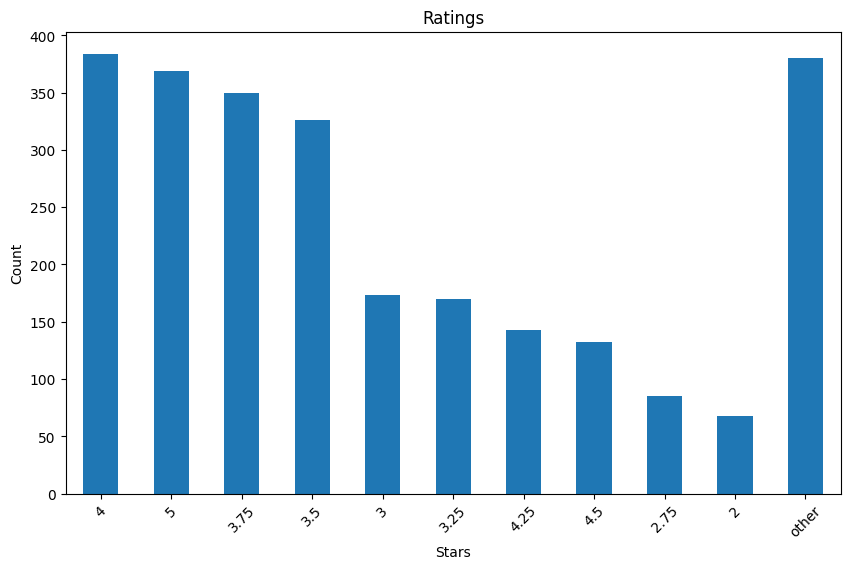

In [26]:
top_Stars = df_file['Stars'].value_counts().nlargest(10)

other_Stars = pd.Series({'other': df_file.shape[0] - top_Stars.sum()})
combined_Stars = top_Stars.append(other_Stars)

plt.figure(figsize=(10, 6))
combined_Stars.plot(kind='bar')

plt.title('Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menampilkan rating yang diberikan pengulas kepada produk ramen. Disini terlihat bahwa pengulas banyak memberikan bintang 4.0 pada produk ramen.

<ipython-input-27-d056228730b8>:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



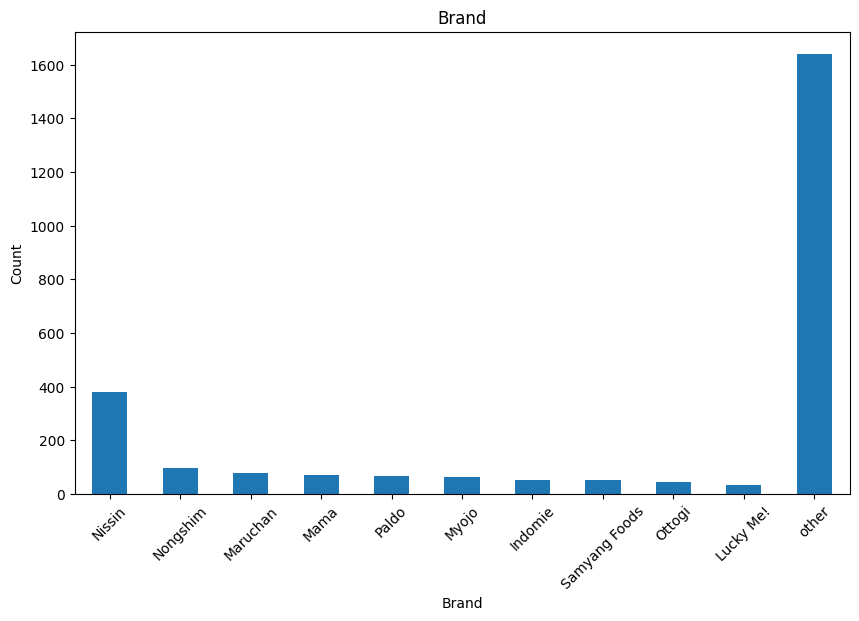

In [27]:
top_countries = df_file['Brand'].value_counts().nlargest(10)

other_Brand = pd.Series({'other': df_file.shape[0] - top_countries.sum()})
combined_countries = top_countries.append(other_Brand)

plt.figure(figsize=(10, 6))
combined_countries.plot(kind='bar')

plt.title('Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menampilkan Top 10 ramen dengan pengulas terbanyak. Visualisasi ini memperlihatkan bahwa Brand Nissin memiliki pengulas terbanyak dan dapat disimpulkan bahwa brand ini merupakan brand yang paling terkenal di khalayak ramai.

In [28]:
df_file['Stars'] = pd.to_numeric(df_file['Stars'], errors='coerce')

df_file = df_file.dropna(subset=['Stars'])

top10_brands = df_file['Brand'].value_counts().nlargest(10).index

df_file_top10 = df_file[df_file['Brand'].isin(top10_brands)]

average_stars_top10 = df_file_top10.groupby('Brand')['Stars'].mean().reset_index()

fig = px.bar(average_stars_top10, x='Brand', y='Stars',
             labels={'Stars': 'Average Stars'},
             title='Rata-rata Nilai Bintang untuk 10 Brand Terbanyak Diulas')
fig.show()

Di korelasi visualisasi ini, terlihat rata-rata rating yang diberikan pengguna kepada 10 Brand yang paling banyak terulas, berdasarkan visualisasi ini, kita dapat melihat Brand dengan rating tertinggi dan terendah. Kita dapat menentukan Brand mana yang paling digemari oleh konsumen dengan membandingkan rata rata ratings yang didapatnya. Dengan visualiasi ini, pemahaman mengenai selera konsumen dan ketepatan dalam mengambil keputusan yang dapat meningkatkan pangsa pasar akan meningkat.

##**Verify Data Quality**

####Missing Values

In [29]:
#Tambahkan kode untuk mengecek apakah ada nilai kosong pada tiap kolom di dataset kalian ya
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=[''])

,
Review #,0.000000
Brand,0.000000
Variety,0.000000
Style,0.077610
Country,0.000000
Stars,0.000000
Top Ten,98.409003


Pada hasil pengecekan nilai kosong di setiap kolom dataset, terdapat informasi bahwa kolom 'Style' memiliki sejumlah kecil nilai kosong (0.077519%), sementara kolom 'Top Ten' memiliki jumlah nilai kosong yang banyak (98.410853%). Berikut adalah penjelasan untuk setiap kolom:

Review : Tidak ada nilai kosong pada kolom ini (0.000000%).

Brand: Tidak ada nilai kosong pada kolom ini (0.000000%).

Variety: Tidak ada nilai kosong pada kolom ini (0.000000%).

Style: Terdapat sedikit nilai kosong pada kolom ini (0.077519%). Jumlahnya relatif kecil.

Country: Tidak ada nilai kosong pada kolom ini (0.000000%).

Stars: Tidak ada nilai kosong pada kolom ini (0.000000%).

Top Ten: Sebagian besar nilai pada kolom ini kosong (98.410853%). Jumlah nilai kosong yang sangat tinggi.

####Outliers Values

In [30]:
#Tambahkan kode untuk mengecek apakah ada outliers pada tiap kolom di dataset kalian ya
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df_file)

Kolom,Persentase Outliers
Review #,0.000000
Stars,5.005821


Hasil pengecekan menunjukan tidak ada data outliers, menandakan bahwa data bersih dan terdistribusi secara normal, sehingga tidak ada yang memenuhi kriteria outliers.

####Duplicated Values

In [31]:
#Tambahkan kode untuk mengecek apakah ada nilai duplikat pada tiap kolom di dataset kalian ya
df_file[df_file.duplicated()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten


Berdasarkan hasil pengecekan dapat disimpulkan bahwa data dalam dataset tidak ada yang duplikat.